In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, PrecisionRecallDisplay, f1_score, confusion_matrix, classification_report




In [2]:
data = pd.read_csv(r'C:\Users\Lenovo\Documents\Projects\FDC\Dataset\creditcard.csv')

print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
X = data.drop('Class', axis =1)
y = data['Class']

In [4]:
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [5]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns = X.columns)

In [6]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_reduced = pd.DataFrame(pca.fit_transform(X_scaled), columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [8]:
data_reduced = pd.concat([X_reduced, y.reset_index(drop=True)], axis = 1)

In [9]:
# Define features and target variable
X_final = data_reduced.drop('Class', axis=1)
y_final = data_reduced['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

In [10]:
print(data_reduced.columns)

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27',
       'Class'],
      dtype='object')


In [13]:
model = RandomForestClassifier (n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Area under the Precision-Recall Curve(AUPRC): 0.8546
Average Precision Score: 0.8546


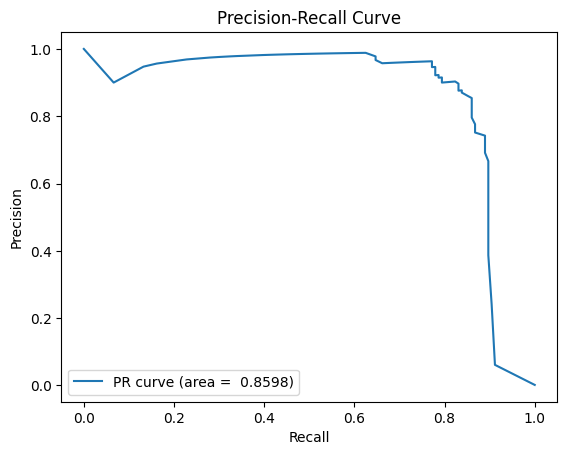

In [14]:
y_probs = model.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_probs)

pr_auc = auc(recall, precision)
average_precision = average_precision_score(y_test, y_probs)

print(f'Area under the Precision-Recall Curve(AUPRC): {average_precision:.4f}')
print(f"Average Precision Score: {average_precision:.4f}")

plt.figure()
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc: .4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [17]:
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('COnfusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report')
print(class_report)

F1 Score: 0.8571
COnfusion Matrix:
[[85303     4]
 [   31   105]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.77      0.86       136

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

